# WHETGEO-2D
## Kirkland et al. 1992, test problem 1

    -Authors: Niccolò Tubini, Riccardo Rigon
    - Licence: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License

----
**This notebook is freely inspired to the Notebooks presented in Clark et al. (2021)**

## Table of Contents

* [Expectations](#Expectations)
* [Meta data](#Meta-data)
* [Reference](#Reference)
* [Computational grid](#Computational-grid)
* [Visualize the output](#Visualize-the-output)
    * [Saturation degree](#Saturation-degree)




## Expectations
The simulation should reproduce the results of the test problem 1 presented in Kirkland et al. (1992).

This problem is interesting since it tests the ability of the numerical model to capture the transition from very dry conditions to saturated case.
<figure>
    <center>
    <img src="Figures/Kirkland_et_al_1992_TP1.PNG" width="400" height="400/1.618">
    <figcaption>Figure (3) in Kirkland et al. (1992). </figcaption>
    </center>
</figure>

## Meta data

| Data  | Value  |
|:---|:---|
| Model name| WHETGEO-2D |
| Model version  |  v0.9-beta |
| Model reference | Tubini and Rigon (2022) |
| Grid input file | `data/mesh/Kirkland_et_al_TP1.mesh` |
| Boundary condition file | `data/Timeseries/Kirkland_et_al_1992/Kirkland_et_al_1992_TP1.csv` |
| .sim file | `simulation/WHETGEO2D_Kirkland_1992_TP1.sim` |
| Model runs by | E. Borinato|
| Notebook code by | N. Tubini | 

## Reference

- Clark, M.P., Zolfaghari, R., Green, K.R., Trim, S.J., Knoben, W.J., Bennett, A.R., Nijssen, B., Ireson, A.M., & Spiteri, R.J. (2021). The numerical implementation of land models: Problem formulation and laugh tests. Journal of Hydrometeorology.

- Kirkland, M. R., Hills, R. G., & Wierenga, P. J. (1992). Algorithms for solving Richards' equation for variably saturated soils. Water Resources Research, 28(8), 2049-2058.

- McBride, D., Cross, M., Croft, N., Bennett, C., & Gebhardt, J. (2006). Computational modelling of variably saturated flow in porous media with complex three‐dimensional geometries. International journal for numerical methods in fluids, 50(9), 1085-1117.

- Tubini, N.: Theoretical and numerical tools for studying the Critical Zone from plot to catchments, PhD thesis, University of Trento, 2021.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl # to define new color map
import matplotlib.patches as mpatches
from matplotlib import rc
%matplotlib inline
import matplotlib.style as style 
import matplotlib.tri as tri
import math
import xarray as xr

import whetgeo2d_mesh 
from whetgeo2d_output import*

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

plt.rcParams.update(nice_fonts)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])




In [2]:
project_path = os.path.dirname(os.getcwd())

In [3]:
[triangles, nodes, ID, x_c, y_c] = whetgeo2d_mesh.reconstruct_gmsh_mesh(project_path+"/data/mesh/Kirkland_et_al_1992_TP1.mesh") 

## Visualize the mesh

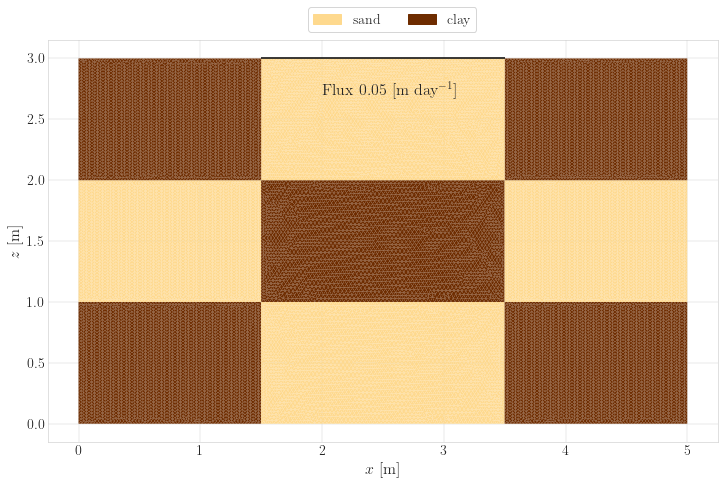

In [4]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
ax.hlines(3,xmin=1.5, xmax=3.5)
ax.annotate('Flux $0.05$ [m day$^{-1}$]', xy=(2,2.7))
whetgeo2d_mesh.show_domain(ax, nodes, triangles, ID, layer_list=['sand','clay'])
# fig.savefig('Kirkland_et_al_1992_TP1_setup.pdf', format='pdf', bbox_inches='tight')



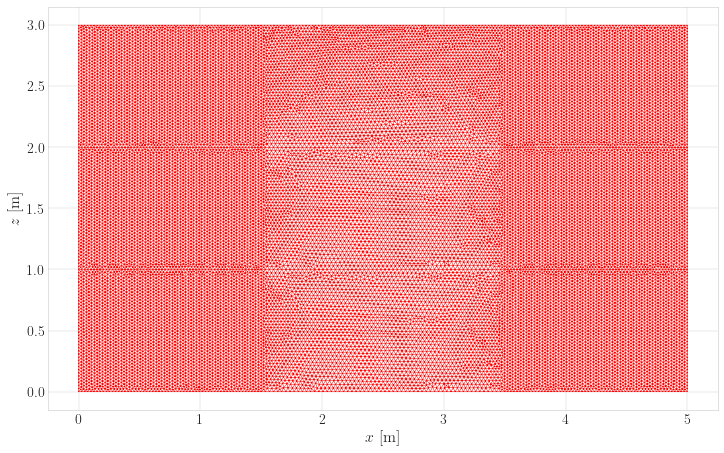

In [76]:
fig, ax = plt.subplots(figsize=(12,12/1.618))
whetgeo2d_mesh.show_unstructured_grid(ax, nodes, triangles)
# fig.savefig('Kirkland_et_al_1992_TP1_setup.pdf', format='pdf', bbox_inches='tight')



## Visualize the output

Here we report the numerical solution for the saturation degree after 12.5 days.

In [81]:
ds = xr.open_dataset(project_path+'/output/Kirkland_et_al_1992_TP1_unstructured_0000.nc')
# ds.keys

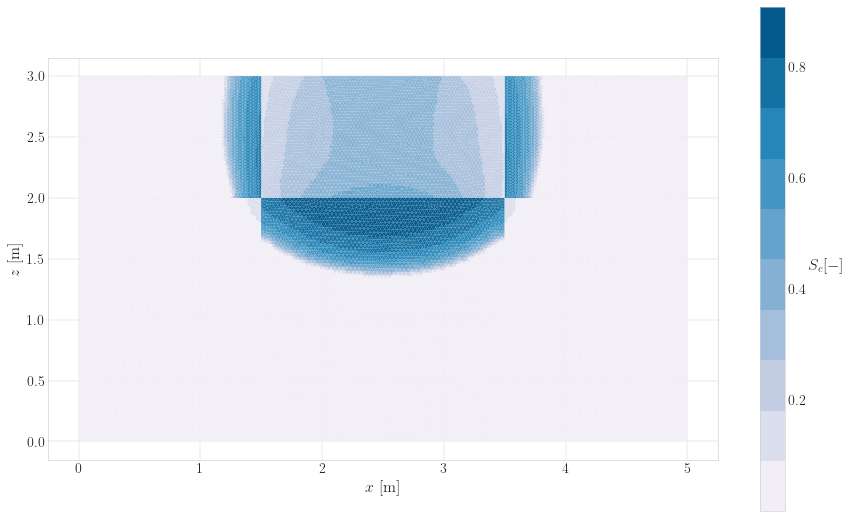

In [87]:
fig, ax = plt.subplots(figsize=(15,15/1.618))
plot_2D(ax, nodes, triangles, ds.saturationDegree.values[-1,:], colorbar_name='$S_e [-]$')
